In [1]:
pwd

'/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF+Newton/Server_all_experiments/recursive_all/tweet_recursive'

In [11]:
import numpy as np
import matplotlib.pyplot as plt
new_pred_k = np.load("new_predictions_tweet_LR_I100_D1.npy", allow_pickle=True).squeeze()
app_k = np.array(np.load("NT_app_k_tweet_LR_I100_D1.npy", allow_pickle=True).squeeze())
old_prediction = np.load("/Users/eciel/Desktop/y3s2_sum/orf/summer/privacy_methods/LR/IF/Logistic_tweet/old_predictions.npy", allow_pickle=True).squeeze()
#exact_ks = np.load("exact_ks_IP.npy", allow_pickle=True)
#pred = np.load("pred.npy", allow_pickle=True)
app_k.shape

(1000,)

In [12]:
pred = old_prediction

In [13]:
new_pred_k_nonon = [new_pred_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

988

# can find smallest k

In [14]:
app_k_nonon = [app_k[i] for i in range(len(new_pred_k)) if new_pred_k[i] != None]
len(new_pred_k_nonon)

988

In [15]:
np.mean(app_k_nonon)

177.23582995951418

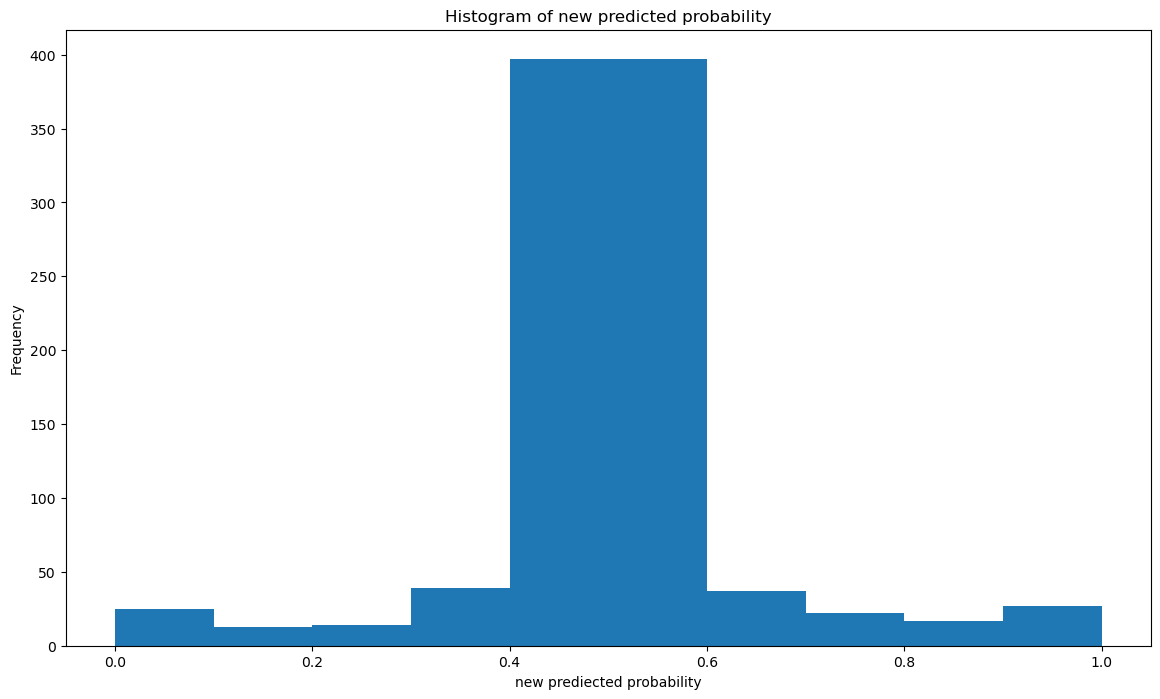

In [16]:
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(new_pred_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

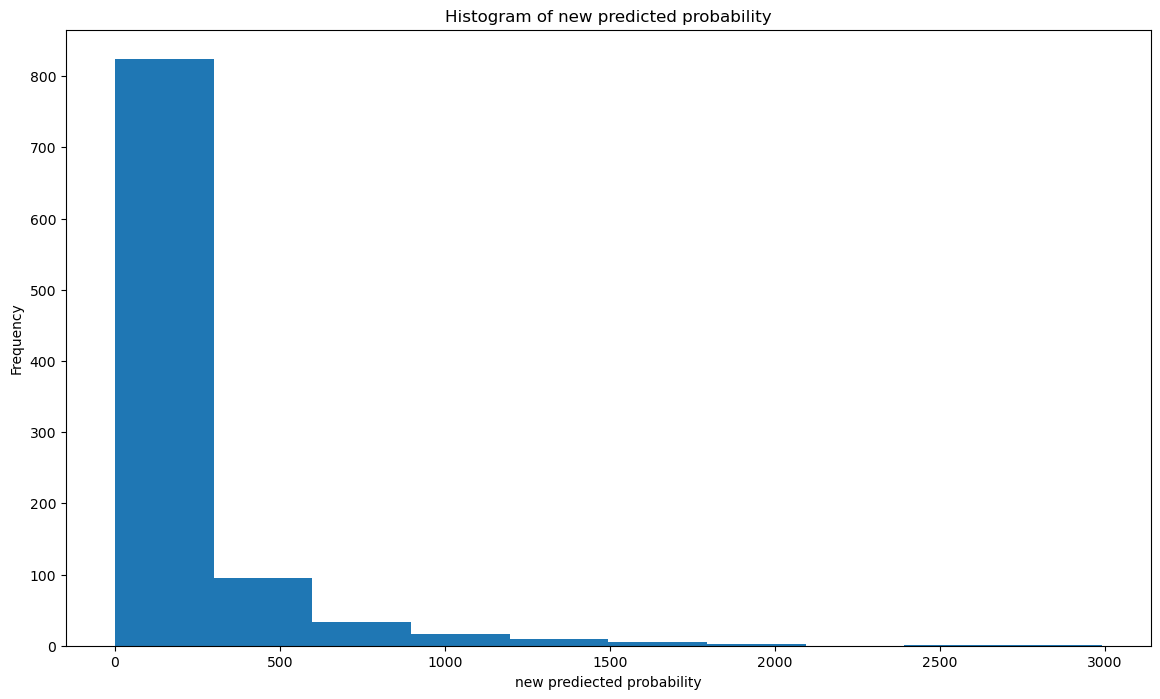

In [17]:

plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(app_k_nonon, bins=10)
plt.xlabel("new prediected probability")
plt.ylabel("Frequency")
plt.title("Histogram of new predicted probability")
plt.show()

In [18]:
flips = np.zeros((len(new_pred_k), 1))
diff = np.zeros((len(new_pred_k), 1))

#1: flip the label, 0: not flip the label, 2: cannot found k
for i in range(app_k.shape[0]):
    print("i", i)
    if app_k[i] != None:
        if np.round(pred[i].item()) != np.round(new_pred_k[i].item()):
            flips[i, :] = 1
        else:
            flips[i, :] = 0  
            
        diff[i] = new_pred_k[i] - 0.5
        
        print("old", pred[i].item())
        print("new", new_pred_k[i].item())
        print("appro k", app_k[i])
        print("flip label", flips[i, :])
        print()
        
    else:
        flips[i, :] = 2
        #print("appro k", app_k[i])

i 0
old 0.28689993656782226
new 0.5378336445001668
appro k 112
flip label [1.]

i 1
old 0.32146258917889864
new 0.5325629475373759
appro k 70
flip label [1.]

i 2
old 0.14097321800049326
new 0.8050327133034
appro k 203
flip label [1.]

i 3
old 0.6769152016470324
new 0.48435350378168796
appro k 25
flip label [1.]

i 4
old 0.5815097408839184
new 0.4957307933633755
appro k 22
flip label [1.]

i 5
old 0.7626973015862507
new 0.4422144359189922
appro k 148
flip label [1.]

i 6
old 0.5225979274824073
new 0.4991118821232141
appro k 6
flip label [1.]

i 7
old 0.43663163322029336
new 0.5032753692718109
appro k 6
flip label [1.]

i 8
old 0.15274158233793952
new 0.8110412316254765
appro k 476
flip label [1.]

i 9
old 0.8910169329723387
new 0.19169275362581037
appro k 170
flip label [1.]

i 10
old 0.3439817586098287
new 0.5059966734771741
appro k 60
flip label [1.]

i 11
old 0.4528109402862329
new 0.5000500590101623
appro k 14
flip label [1.]

i 12
old 0.5587881972017871
new 0.498843977914856
appro

In [19]:
# flip the label
num_flip = np.sum([flips[i] == 1 for i in range(len(new_pred_k))])
num_flip

905

In [20]:
app_k.shape

(1000,)

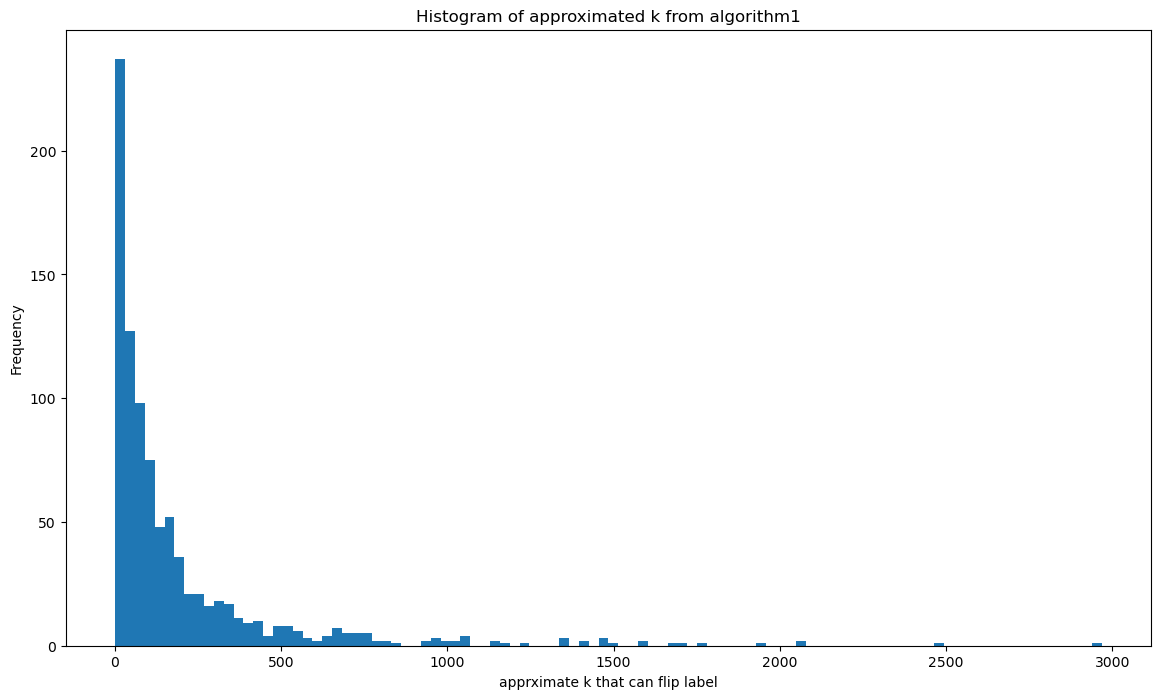

In [12]:

flip_idx = np.array([i for i in range(len(new_pred_k)) if flips[i] == 1 ])
K_flip = app_k[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("apprximate k that can flip label")
plt.ylabel("Frequency")
plt.title("Histogram of approximated k from algorithm1")
plt.show()

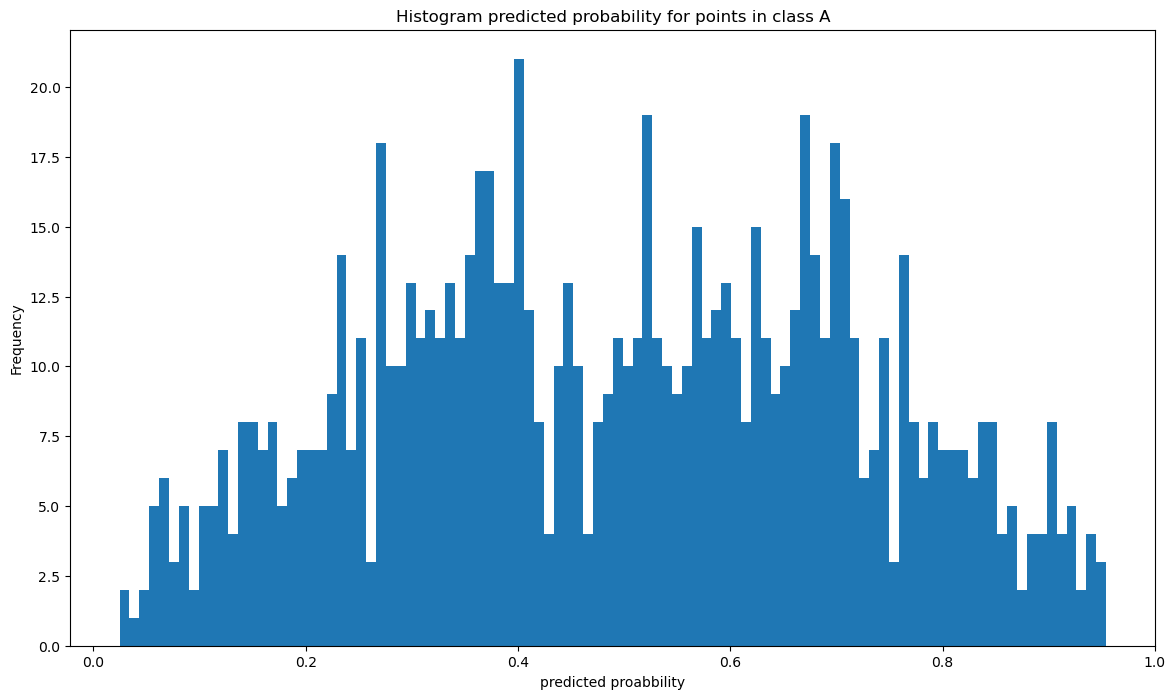

In [13]:
old_prediction
K_flip = old_prediction[flip_idx]
# Plot exact k distribution
plt.figure(figsize=(14, 8))
n, bins, patches=plt.hist(K_flip, bins=100)
plt.xlabel("predicted proabbility")
plt.ylabel("Frequency")
plt.title("Histogram predicted probability for points in class A")
plt.show()

In [14]:
# not flip the label
num_noflip = np.sum([flips[i] == 0 for i in range(len(new_pred_k))])
num_noflip

94

In [15]:
# diff for those flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 1]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.07635538309959215, 0.015821129194510657)

In [16]:
# diff for those not flip the lable
diff1=[diff[i] for i in range(len(new_pred_k)) if flips[i] == 0]
np.mean(np.abs(diff1)), np.var(np.abs(diff1))

(0.0018264354196311577, 3.266807139097544e-06)